### 데이터 불러오기

In [70]:
import torch
import torchvision
import torchvision.transforms as transforms

In [71]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


### 데이터 일부 확인

In [72]:
trainset.data.shape

(50000, 32, 32, 3)

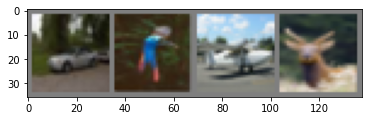

car   bird  plane deer 


In [73]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  #plt.imshow는 이미지의 세번째 축에 rgb가 들어가야된다!
    plt.show()
  

# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## 모델 정의
이후부터 과제 진행하시면 됩니다! 위는 수정 XX

'#####으로 표시된 부분에 작성하세요!

In [74]:
import torch.nn as nn

In [121]:
from torch.nn.modules.pooling import MaxPool2d
# conv. layer, relu,  pooling layer, fc layer를 모두 1층 이상 사용하는 모델 Net()을 만들어주세요

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        ##### 아래 작성 #####
        self.layer = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels= 16, kernel_size= 3,padding = 1),   #(32, 32, 3)
            nn.ReLU(),
            nn.Conv2d(in_channels=16,out_channels=32, kernel_size=3, padding =1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # ->(16,16,64)

            nn.Conv2d(in_channels=32,out_channels= 64, kernel_size= 3,padding = 1),
            nn.ReLU(),
                       
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(16*16*64, 100),
            nn.ReLU(),
            nn.Linear(100,10)
        )

    def forward(self, x):
       ##### 아래 작성 #####
      
       out = self.layer(x)
       out = self.fc_layer(out.view(out.size(0),-1))

       return out


net = Net()

## 손실함수, optimizer 정의
필요한 모듈을 import하고 손실함수는 CrossEntropyLoss, optimizer는 SGD를 사용해주세요.

optimizer의 하이퍼파라미터는 lr=0.001, momentum=0.9로 통일합니다.

작성한 모델이 무거워 실행 시간이 오래 걸린다면 GPU를 활용하세요.

In [122]:
import torch.optim ####
device=torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')  

print(device)
net =Net().to(device)
criterion = nn.CrossEntropyLoss() #####
optimizer = torch.optim.SGD(net.parameters(), lr = 0.001,momentum = 0.9) #####

cuda:0


## 모델 구조 확인
필요한 모듈을 import하여 모델의 구조를 확인하세요.

In [123]:
from torchsummary import summary #####
summary(net, (3, 32, 32), batch_size = batch_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [4, 16, 32, 32]             448
              ReLU-2            [4, 16, 32, 32]               0
            Conv2d-3            [4, 32, 32, 32]           4,640
              ReLU-4            [4, 32, 32, 32]               0
         MaxPool2d-5            [4, 32, 16, 16]               0
            Conv2d-6            [4, 64, 16, 16]          18,496
              ReLU-7            [4, 64, 16, 16]               0
            Linear-8                   [4, 100]       1,638,500
              ReLU-9                   [4, 100]               0
           Linear-10                    [4, 10]           1,010
Total params: 1,663,094
Trainable params: 1,663,094
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/backward pass size (MB): 4.26
Params size (MB): 6.34
Estimat

## Train

In [124]:
trainloader.dataset.data.shape

(50000, 32, 32, 3)

In [125]:
# 모델을 학습

for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data
        ##### 아래 작성 #####
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        
        out = net.forward(inputs)

        loss = criterion(out, labels)

        loss.backward()
        
        optimizer.step()

        


        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i+1:5d}] loss: {running_loss / 2000:.3f}')## 1:5d format함수의 두번째 파라미터를 5번째자리까지 가져옴
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.016
[1,  4000] loss: 1.629
[1,  6000] loss: 1.493
[1,  8000] loss: 1.348
[1, 10000] loss: 1.269
[1, 12000] loss: 1.194
[2,  2000] loss: 1.052
[2,  4000] loss: 1.035
[2,  6000] loss: 1.014
[2,  8000] loss: 0.958
[2, 10000] loss: 0.925
[2, 12000] loss: 0.928
Finished Training


## Test

In [126]:
dataiter = iter(testloader)
images, labels = dataiter.next()

In [127]:
## 아래 코드 그대로 실행

correct = 0
total = 0
# 학습 중이 아니므로, 출력에 대한 변화도를 계산할 필요가 없습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        # 신경망에 이미지를 통과시켜 출력을 계산합니다
        outputs = net(images)
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 68 %


## 클래스별 accuracy 비교

In [128]:
## 아래 코드 그대로 실행

# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# 변화도는 여전히 필요하지 않습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모읍니다
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 74.7 %
Accuracy for class: car   is 78.7 %
Accuracy for class: bird  is 56.5 %
Accuracy for class: cat   is 45.5 %
Accuracy for class: deer  is 64.1 %
Accuracy for class: dog   is 63.1 %
Accuracy for class: frog  is 73.1 %
Accuracy for class: horse is 70.7 %
Accuracy for class: ship  is 83.3 %
Accuracy for class: truck is 77.3 %
